In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset1 = pd.read_excel("/content/linear regression simple ex1 (1).xlsx")

In [5]:
dataset1

,Individual,Arm strength (x),Dynamic lift(y)
0,1,17.3,71.7
1,2,19.3,48.3
2,3,19.5,88.3
3,4,19.7,75.0
4,5,22.9,91.7
5,6,23.1,100.0
6,7,26.4,73.3
7,8,26.8,65.0
8,9,27.6,75.0
9,10,28.1,88.3


In [6]:
x = dataset1['Arm strength (x)']
y = dataset1['Dynamic lift(y)']

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

# **Linear Regression Equation**

In [8]:
num = 0
den = 0
n = len(x)
for i in range(n):
  num+= (x[i]-mean_x)*(y[i]-mean_y)
  den+= (x[i]-mean_x)**2
m = num/den
c = mean_y-(m*mean_x)
print("Numerator:", num)
print("Denominator:", den)
print("m (Slope) value:", m)
print("Constant (Y-intercept) value:", c)

Numerator: 1310.64
Denominator: 2336.6823999999997
m (Slope) value: 0.5608977925284157
Constant (Y-intercept) value: 64.52915555832492


# **Scatter Plot**

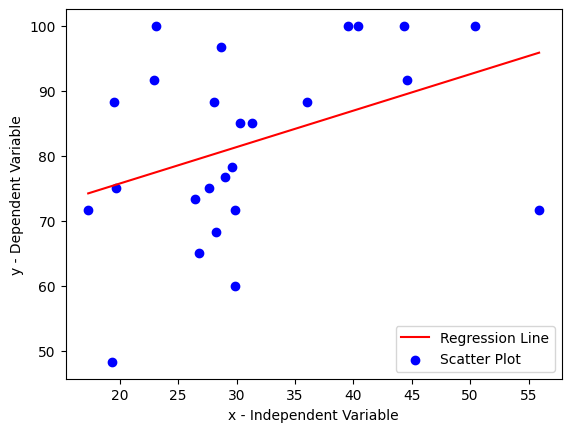

In [9]:
max_x = np.max(x)
min_x = np.min(x)
X = np.linspace(min_x, max_x, 10)
Y = c + m*X
plt.plot(X, Y, color = 'red', label = 'Regression Line')
plt.scatter(x,y,c='blue', label = 'Scatter Plot')
plt.xlabel('x - Independent Variable')
plt.ylabel('y - Dependent Variable')
plt.legend()
plt.show()

In [10]:
for i in range(n):
  dataset1['y_pred'] = c+(m*x)
y_pred = dataset1['y_pred']
dataset1

,Individual,Arm strength (x),Dynamic lift(y),y_pred
0,1,17.3,71.7,74.232687
1,2,19.3,48.3,75.354483
2,3,19.5,88.3,75.466663
3,4,19.7,75.0,75.578842
4,5,22.9,91.7,77.373715
5,6,23.1,100.0,77.485895
6,7,26.4,73.3,79.336857
7,8,26.8,65.0,79.561216
8,9,27.6,75.0,80.009935
9,10,28.1,88.3,80.290384


# **SSR, SSE, SST**

In [13]:
SST = 0
SSE = 0
for i in range(n):
  SST+= (y[i] - mean_y)**2
  SSE+= (y[i] - y_pred[i])**2

SSR = SST-SSE
print("SSE Value:", SSE)
print("SSR Value:", SSR)
print("SST Value:", SST)

SSE Value: 4056.324917200557
SSR Value: 735.1350827994438
SST Value: 4791.460000000001


# **COEFFICIENT OF DETERMINATION**

In [14]:
r_sq = SSR/SST
print("R Square value is:",r_sq)

R Square value is: 0.1534261128757088


# **COVARIANCE**

In [15]:
var_x = [i - mean_x for i in x]
var_y = [i - mean_y for i in y]
var_xy = [i*j for i, j in zip(var_x, var_y)]
cov = sum(var_xy)/(n-1)
print("Covariance:", cov)

Covariance: 54.61000000000001


# **CORELATION COEFFECIENT**

In [17]:
sqr_x = [i**2 for i in var_x]
std_x = round((sum(sqr_x)/(n-1))**0.5,2)
sqr_y = [i**2 for i in var_y]
std_y = round((sum(sqr_y)/(n-1))**0.5,2)
rxy = cov/(std_x*std_y)
print("Corelation Coeffecient:", rxy)

Corelation Coeffecient: 0.39157311145385415


# **CONFIDENCE INTERVAL**

In [18]:
sxx = [i**2 for i in var_x]
sxy = [i*j for i,j in zip(var_x, var_y)]
syy = [i**2 for i in var_y]
s = np.sqrt((sum(syy)-(m*sum(sxy)))/(n-2))
df = n-2
print("s:",s)
print("Degrees of Freedom:", df)

s: 13.28013376897098
Degrees of Freedom: 23


In [19]:
conf_level = 0.95
a = 1-conf_level
ta = 1.713872
sxx1 = sum(sxx)
cil_from, cil_to = m-(ta*s/np.sqrt(sxx1)), m+(ta*s/np.sqrt(sxx1))
print("CIL From:", cil_from)
print("CIL To:", cil_to)

CIL From: 0.09004951114000381
CIL To: 1.0317460739168274


In [20]:
x2 = [i**2 for i in x]
x2 = sum(x2)
ci2_from, ci2_to = c - (ta*(s/np.sqrt(n*sxx1)) * np.sqrt(x2)),c + (ta*(s/np.sqrt(n*sxx1))* np.sqrt(x2))
print("CIL From:", ci2_from)
print("CIL To:", ci2_to)

CIL From: 49.17296598464799
CIL To: 79.88534513200185
